In [138]:
import os
import wfdb
from wfdb import processing
import numpy as np
from scipy import interpolate

In [213]:
class HeartbeatSlicer:
    def __init__(self, record):
        # self.record = wfdb.rdrecord(record_path)
        self.record = record
        self.ecg_data = self.record.p_signal
        self.sampling_rate = self.record.fs
        self.peak_indices = self.detect_peaks()

    def detect_peaks(self):
        """
        Detects peaks in the ECG data.

        Returns: numpy array with the indices of peaks.
        """

        #qrs_detector = wfdb.processing.XQRS(sig=self.ecg_data, fs=self.sampling_rate)
        #qrs_detector.detect()
        #peak_indices = qrs_detector.qrs_inds

        peak_indices = processing.gqrs_detect(sig=self.ecg_data, fs=self.sampling_rate)

        return peak_indices


    def interpolate_sequence(self):
        x = np.linspace(0, len(self.peak_indices) - 1, len(self.peak_indices) - 1)
        f = interpolate.interp1d(np.arange(len(self.peak_indices)), self.peak_indices, kind='cubic')
        print(f(x))

        return f(x)

    def slice_heartbeats(self):
        """
        Slice the ECG data into sequences of a fixed number of consecutive heartbeats.

        num_heartbeats : The number of consecutive heartbeats to include in each sequence.

        Returns: 2D numpy array, each row is a sequence of heartbeats.
        """
        sequences = []

        # FIXME: slicing steps
        for i in range(1, len(self.peak_indices)-1):
            start = self.peak_indices[i] - (self.peak_indices[i] - self.peak_indices[i-1])//2
            end = self.peak_indices[i] +  (self.peak_indices[i+1] - self.peak_indices[i])//2
            sequence = self.ecg_data[start:end]

            sequences.append(sequence)

        return np.array(sequences)



In [234]:
record = wfdb.rdrecord(record_name='data_original/nsrdb/1.0.0/16265', sampfrom=1000 ,sampto=2000)
sliced = HeartbeatSlicer(record)

In [235]:
print(sliced.peak_indices)
sliced.interpolate_sequence()

[ 151  311  476  642  811  966 1128 1293 1452 1604 1765]
[ 151.          329.2295099   512.60064156  698.97454499  880.68656164
 1054.86123014 1238.320224   1417.46986881 1587.03380802 1765.        ]


array([ 151.        ,  329.2295099 ,  512.60064156,  698.97454499,
        880.68656164, 1054.86123014, 1238.320224  , 1417.46986881,
       1587.03380802, 1765.        ])

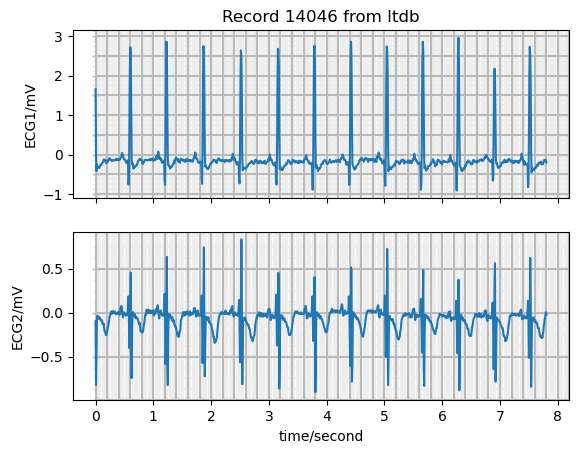

In [237]:
wfdb.plot_wfdb(record=record, title='Record 14046 from ltdb', ecg_grids='all')

In [238]:
heartbeats = sliced.slice_heartbeats()

print(len(heartbeats))
print(heartbeats)


9
[array([[-0.195, -0.025],
        [-0.205, -0.015],
        [-0.195, -0.035],
        [-0.175,  0.025],
        [-0.565,  0.195],
        [-0.735, -0.055],
        [ 0.045, -0.575],
        [ 1.855, -0.335],
        [ 2.745,  0.145],
        [ 2.595,  0.745],
        [ 1.645, -0.155],
        [ 0.085, -0.725],
        [-0.305, -0.365],
        [-0.275, -0.095],
        [-0.285, -0.045],
        [-0.335, -0.055],
        [-0.355, -0.055],
        [-0.355, -0.075],
        [-0.335, -0.085],
        [-0.355, -0.055],
        [-0.315, -0.105],
        [-0.295, -0.095],
        [-0.275, -0.115],
        [-0.235, -0.125],
        [-0.235, -0.135],
        [-0.225, -0.135],
        [-0.205, -0.155],
        [-0.185, -0.185],
        [-0.185, -0.205],
        [-0.165, -0.235],
        [-0.125, -0.275],
        [-0.135, -0.275],
        [-0.135, -0.315],
        [-0.145, -0.345],
        [-0.145, -0.315],
        [-0.175, -0.325],
        [-0.205, -0.325],
        [-0.185, -0.295],
        [-

/tmp/ipykernel_27200/1434078331.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sequences)


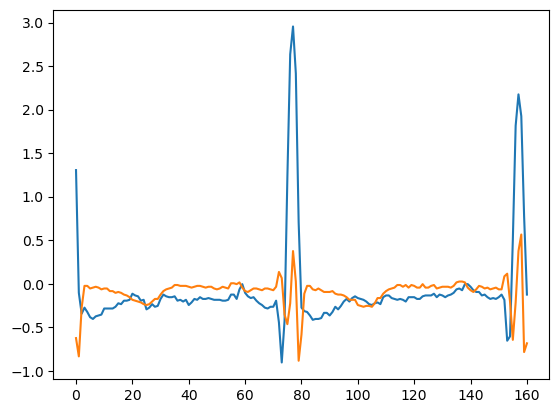

In [239]:
import matplotlib.pyplot as plt

plt.plot(heartbeats[3])
plt.show()


In [240]:
print(heartbeats)

[array([[-0.195, -0.025],
        [-0.205, -0.015],
        [-0.195, -0.035],
        [-0.175,  0.025],
        [-0.565,  0.195],
        [-0.735, -0.055],
        [ 0.045, -0.575],
        [ 1.855, -0.335],
        [ 2.745,  0.145],
        [ 2.595,  0.745],
        [ 1.645, -0.155],
        [ 0.085, -0.725],
        [-0.305, -0.365],
        [-0.275, -0.095],
        [-0.285, -0.045],
        [-0.335, -0.055],
        [-0.355, -0.055],
        [-0.355, -0.075],
        [-0.335, -0.085],
        [-0.355, -0.055],
        [-0.315, -0.105],
        [-0.295, -0.095],
        [-0.275, -0.115],
        [-0.235, -0.125],
        [-0.235, -0.135],
        [-0.225, -0.135],
        [-0.205, -0.155],
        [-0.185, -0.185],
        [-0.185, -0.205],
        [-0.165, -0.235],
        [-0.125, -0.275],
        [-0.135, -0.275],
        [-0.135, -0.315],
        [-0.145, -0.345],
        [-0.145, -0.315],
        [-0.175, -0.325],
        [-0.205, -0.325],
        [-0.185, -0.295],
        [-0.